In [1]:
from math import atan2, hypot, cos, degrees
import numpy as np
import matplotlib.pyplot as plt
import half_tone_selector.color as htc

# import importlib
# importlib.reload(htc)

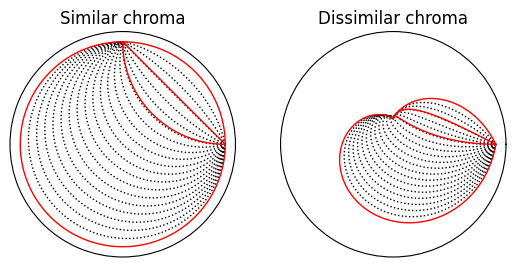

In [2]:
a, b = (np.pi*0.0, np.pi*0.5)
p = min(abs(b-a), 2*np.pi - abs(b-a))/2

def getPoints(k, chroma):
    lch1 = (1, 1, a)
    lch2 = (1, chroma, b)
    lchs = [htc.interpolateOklch(lch1, lch2, t, k) for t in np.arange(0, 1.01, 0.01)]
    theta = [h for _, _, h in lchs]
    r = [c for _, c, _ in lchs]
    return theta, r

fig, axes = plt.subplots(1, 2, subplot_kw={'projection': 'polar'})

def plot(ax, title, chroma):
    ax.set_rlim(0, 1.1)
    for k in np.arange(-0.9, 1, 0.1):
        theta, r = getPoints(k, chroma)
        ax.plot(theta, r, linestyle='dotted', linewidth=1, color='k')
    for k in [-1, 2*cos(p)-1, cos(p), 1]:
        theta, r = getPoints(k, chroma)
        ax.plot(theta, r, linestyle='solid', linewidth=1, color='r')
    ax.set_rticks([])
    ax.set_xticks([])
    ax.set_title(title)

plot(axes[0], 'Similar chroma', 1)
plot(axes[1], 'Dissimilar chroma', 0.25)
plt.show()

In [3]:
fig.savefig('curves.png', bbox_inches='tight')